# 소프트맥스 회귀 수식 이해 정리

다항 로지스틱 회귀(multi-class logistic regression) 또는 소프트맥스 회귀는 각 클래스에 대해 선형 점수를 계산하고, 이를 softmax 함수를 통해 확률로 변환하는 방식이다.

아래는 그 구조에 대한 이해를 정리한 것이다.

---

## 클래스 별 logit 수식

$$
s_k(\mathbf{x}) = \left( \boldsymbol{\theta}^{(k)} \right)^T \mathbf{x}
$$

- $ \mathbf{x}$ : 입력 특성 벡터 (feature vector)
- $ \boldsymbol{\theta}^{(k)}$ : 클래스 \( k \)에 해당하는 가중치 벡터
- $ s_k(\mathbf{x}$ : 입력이 클래스 \( k \)일 “점수(logit)”

---

## 전치 연산\(T\)

- 벡터 간 내적을 위해 형식을 맞추는 연산
- $( \boldsymbol{\theta}^{(k)})$는 열벡터 형태이므로, 이를 전치하여 행벡터로 만든 뒤 $ \mathbf{x}$ 와 곱함
- 수학적으로는:
  $ (\boldsymbol{\theta}^{(k)})^T \cdot \mathbf{x} = \sum_{i=1}^{d} \theta_i^{(k)} \cdot x_i\ $

---

## 클래스별 가중치 구조

- 소프트맥스 회귀는 클래스마다 고유한 가중치 벡터를 갖는다.
- 전체 모델의 파라미터는 $K$ 개의 가중치 벡터로 구성된 하나의 행렬 $ ( \Theta \in \mathbb{R}^{K \times d} )$
- 각 클래스별 점수는 다음처럼 계산됨:
$$
  s_k = \left( \boldsymbol{\theta}^{(k)} \right)^T \mathbf{x}
  \quad \text{for } k = 1, 2, ..., K
$$
---

## softmax 변환

- 계산된 점수 $ s_k$ 들을 softmax 함수에 넣어 확률로 변환:
$$
  \hat{p}_k = \sigma(s(\mathbf{x}))_k = \frac{\exp(s_k(\mathbf{x}))}{\sum_{j=1}^{K} \exp(s_j(\mathbf{x}))}
$$
- $ s(\mathbf{x})\colon 입력\ \mathbf{x}\ 에\ 대한\ 로짓\ 벡터\ (모델이\ 출력한\ 점수들)$
- $ s_k(\mathbf{x})\colon 그중\ 클래스\ k\ 에\ 해당하는\ 로짓$
- $ \exp(s_k(\mathbf{x})) = e^{s_k(\mathbf{x})}\colon 지수화$
- $\hat{p}_k\colon softmax를\ 거친\ 뒤의\ 확률값\ (클래스\ k\ 일\ 확률)$

---

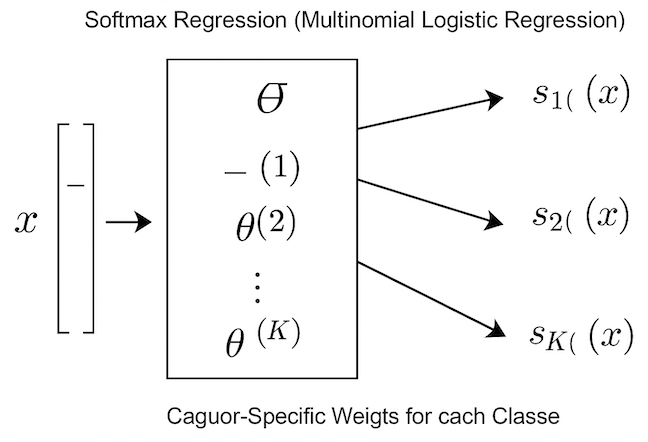
## 요약

- 입력 $ \mathbf{x}$에 대해 각 클래스의 점수를 선형으로 계산
- 각 클래스는 고유한 가중치 벡터 $ ( \boldsymbol{\theta}^{(k)})$를 가짐
- 모든 점수는 softmax를 거쳐 확률로 변환됨
- 확률이 가장 높은 클래스가 최종 예측 결과
- softmax는 입력 벡터를 정규화하여 총합이 1이 되는 확률 분포로 바꿔준다.
> 참고: softmax의 gradient는 cross entropy loss와 함께 사용할 때 간단한 형태로 미분이 된다.


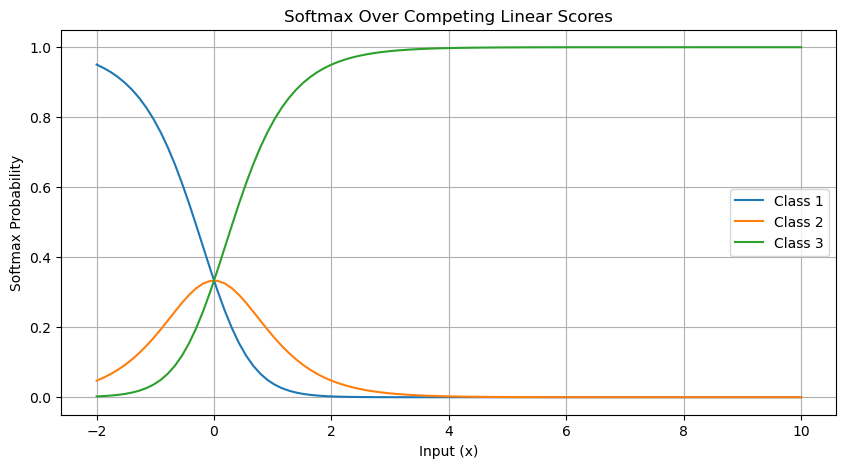

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

x = np.linspace(-2, 10, 100)

# 예: 각 클래스가 서로 다른 위치에서 최고점을 갖도록 조정
scores = np.vstack([
    -1.5 * x,
    0.0 * x,
    1.5 * x
])

y = np.apply_along_axis(softmax, 0, scores)

plt.figure(figsize=(10, 5))
for i in range(y.shape[0]):
    plt.plot(x, y[i], label=f'Class {i+1}')
plt.title("Softmax Over Competing Linear Scores")
plt.xlabel("Input (x)")
plt.ylabel("Softmax Probability")
plt.legend()
plt.grid(True)
plt.show()

- 위 그래프는 여러 클래스 입력에 대해 softmax가 어떻게 반응하는지를 보여준다.
- `np.exp(x - np.max(x))` 는 overflow 방지를 위한 안정화 기법.